In [88]:
# https://statkclee.github.io/ml/ml-pm-continuous.html
# https://patentimages.storage.googleapis.com/18/88/18/9866f5716b47f6/KR20000036594A.pdf
# https://datascienceschool.net/view-notebook/8d086f61e13142aab9bea812f986d0fe/
# http://contents.kocw.or.kr/KOCW/document/2014/Chungbuk/choisanghyun/7.pdf
# https://github.com/jaisenc/carstats
# https://github.com/hsteude/used_car_prices/blob/master/model_training.py
# https://github.com/quangbk2010/UsedCar/blob/master/Code/Neural_network_tensorflow.py

In [1]:
# global import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

%matplotlib inline

### [dataset](https://raw.githubusercontent.com/gchoi/Dataset/master/ToyotaCorolla.csv)

In [104]:
df = pd.read_csv("./Datasets/ToyotaCorolla.csv")

In [105]:
df.head(2)

Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight
0  13500   23  46986   Diesel  90         1          0  2000      3    1165
1  13750   23  72937   Diesel  90         1          0  2000      3    1165

In [60]:
df['Automatic'] = df.Automatic.astype(bool)
df['MetColor'] = df.MetColor.astype(bool)

# Price 값의 좌측으로 기울었음. log변환
# plt.hist(df.Price.sort_values())
# plt.show()

df['Price'] = np.log(df.Price)

In [61]:
lb = LabelBinarizer()
df = df.join(pd.DataFrame(lb.fit_transform(df.FuelType))).drop('FuelType', axis=1)

In [62]:
train, nottrain = train_test_split(df, test_size= 0.4)
valid, test = train_test_split(nottrain, test_size= 0.5)

In [13]:
rmse_dict = {}

In [14]:
model = LinearRegression()
model.fit(X=train.drop(['Price'],axis=1), y=train.Price)

est_Price = model.predict(X=valid.drop(['Price'],axis=1))
valid_rmse = mean_squared_error(y_true=valid.Price,y_pred=est_Price)
print("RMSE of model with validation set is %2f" %(valid_rmse))

est_Price = model.predict(X=test.drop(['Price'],axis=1))
test_rmse = mean_squared_error(y_true=test.Price,y_pred=est_Price)
print("RMSE of model with test set is %2f" %(test_rmse))

rmse_dict.update({"LinearRegression":[valid_rmse, test_rmse]})

RMSE of model with validation set is 0.015703
RMSE of model with test set is 0.015697


In [15]:
model = LinearSVR(max_iter=1e5)
model.fit(X=train.drop(['Price'],axis=1), y=train.Price)

est_Price = model.predict(X=valid.drop(['Price'],axis=1))
valid_rmse = mean_squared_error(y_true=valid.Price,y_pred=est_Price)
print("RMSE of model with validation set is %2f" %(valid_rmse))

est_Price = model.predict(X=test.drop(['Price'],axis=1))
test_rmse = mean_squared_error(y_true=test.Price,y_pred=est_Price)
print("RMSE of model with test set is %2f" %(test_rmse))

rmse_dict.update({"LinearSVM":[valid_rmse, test_rmse]})

RMSE of model with validation set is 1.023694
RMSE of model with test set is 0.770599


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
model = SVR(kernel='rbf', max_iter=1e5, gamma = 'auto')
model.fit(X=train.drop(['Price'],axis=1), y=train.Price)

est_Price = model.predict(X=valid.drop(['Price'],axis=1))
valid_rmse = mean_squared_error(y_true=valid.Price,y_pred=est_Price)
print("RMSE of model with validation set is %2f" %(valid_rmse))

est_Price = model.predict(X=test.drop(['Price'],axis=1))
test_rmse = mean_squared_error(y_true=test.Price,y_pred=est_Price)
print("RMSE of model with test set is %2f" %(test_rmse))

rmse_dict.update({"SVM":[valid_rmse, test_rmse]})

RMSE of model with validation set is 0.094539
RMSE of model with test set is 0.084601


In [17]:
model = RandomForestRegressor(n_estimators = 100, criterion="mse")
model.fit(X=train.drop(['Price'],axis=1), y=train.Price)

est_Price = model.predict(X=valid.drop(['Price'],axis=1))
valid_rmse = mean_squared_error(y_true=valid.Price,y_pred=est_Price)
print("RMSE of model with validation set is %2f" %(valid_rmse))

est_Price = model.predict(X=test.drop(['Price'],axis=1))
test_rmse = mean_squared_error(y_true=test.Price,y_pred=est_Price)
print("RMSE of model with test set is %2f" %(test_rmse))

rmse_dict.update({"RandomForest":[valid_rmse, test_rmse]})

RMSE of model with validation set is 0.014872
RMSE of model with test set is 0.016057


In [18]:
model = GradientBoostingRegressor()
model.fit(X=train.drop(['Price'],axis=1), y=train.Price)

est_Price = model.predict(X=valid.drop(['Price'],axis=1))
valid_rmse = mean_squared_error(y_true=valid.Price,y_pred=est_Price)
print("RMSE of model with validation set is %2f" %(valid_rmse))

est_Price = model.predict(X=test.drop(['Price'],axis=1))
test_rmse = mean_squared_error(y_true=test.Price,y_pred=est_Price)
print("RMSE of model with test set is %2f" %(test_rmse))

rmse_dict.update({"GradientBoosting":[valid_rmse, test_rmse]})

RMSE of model with validation set is 0.013815
RMSE of model with test set is 0.013820


In [20]:
model = BaggingRegressor()
model.fit(X=train.drop(['Price'],axis=1), y=train.Price)

est_Price = model.predict(X=valid.drop(['Price'],axis=1))
valid_rmse = mean_squared_error(y_true=valid.Price,y_pred=est_Price)
print("RMSE of model with validation set is %2f" %(valid_rmse))

est_Price = model.predict(X=test.drop(['Price'],axis=1))
test_rmse = mean_squared_error(y_true=test.Price,y_pred=est_Price)
print("RMSE of model with test set is %2f" %(test_rmse))

rmse_dict.update({"Bagging":[valid_rmse, test_rmse]})

RMSE of model with validation set is 0.015427
RMSE of model with test set is 0.015556


In [21]:
model = AdaBoostRegressor()
model.fit(X=train.drop(['Price'],axis=1), y=train.Price)

est_Price = model.predict(X=valid.drop(['Price'],axis=1))
valid_rmse = mean_squared_error(y_true=valid.Price,y_pred=est_Price)
print("RMSE of model with validation set is %2f" %(valid_rmse))

est_Price = model.predict(X=test.drop(['Price'],axis=1))
test_rmse = mean_squared_error(y_true=test.Price,y_pred=est_Price)
print("RMSE of model with test set is %2f" %(test_rmse))

rmse_dict.update({"AdaBoost":[valid_rmse, test_rmse]})

RMSE of model with validation set is 0.015993
RMSE of model with test set is 0.016465


In [22]:
model = XGBRegressor()
model.fit(X=train.drop(['Price'],axis=1), y=train.Price)

est_Price = model.predict(valid.drop(['Price'],axis=1))
valid_rmse = mean_squared_error(y_true=valid.Price,y_pred=est_Price)
print("RMSE of model with validation set is %2f" %(valid_rmse))

est_Price = model.predict(test.drop(['Price'],axis=1))
test_rmse = mean_squared_error(y_true=test.Price,y_pred=est_Price)
print("RMSE of model with test set is %2f" %(test_rmse))

rmse_dict.update({"XGBoost":[valid_rmse, test_rmse]})

RMSE of model with validation set is 0.014431
RMSE of model with test set is 0.014186


In [40]:
result = pd.DataFrame(rmse_dict).T.rename(columns={0:'valid',1:'test'})

In [41]:
result.drop(['LinearSVM','SVM'],axis=0).plot.bar(rot=0)
plt.xticks(rotation=30)
plt.show()

### XGBOOST DETAIL

In [71]:
import xgboost as xgb
# https://xgboost.readthedocs.io/en/latest/parameter.html
# https://xgboost.readthedocs.io/en/latest/python/python_intro.html
# https://xgboost.readthedocs.io/en/latest/python/python_api.html
# https://xgboost.readthedocs.io/en/latest/parameter.html?highlight=objective
# https://xgboost.readthedocs.io/en/latest/python/python_intro.html#setting-parameters

In [63]:
# convert pd.DataFrame to DMatrix
dtrain = xgb.DMatrix(data=train.drop('Price', axis=1), label=pd.DataFrame(train.Price))
dvalid = xgb.DMatrix(data=valid.drop('Price', axis=1), label=pd.DataFrame(valid.Price))
dtest = xgb.DMatrix(data=test.drop('Price', axis=1), label=pd.DataFrame(test.Price))

In [106]:
param = {
    'max_depth':3, 
    'learning_rate':0.1, 
    'n_estimators':100, 
    'eta':1, 
    'verbosity':1, 
    'objective':'reg:linear', 
     'booster':'gbtree', 
    'n_jobs':1, 
    'nthread':4, 
    'gamma':0, 
    'base_score':0.5, 
    'random_state':0,
    'importance_type':'gain',
    'eval_metric':['rmse','mae']
}
num_round = 1000

validtest = [(dtrain, 'train'), (dvalid, 'valid')]

In [107]:
# train
bst = xgb.train(params=param, dtrain=dtrain, num_boost_round=num_round, evals=validtest, early_stopping_rounds = 8)

[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[0]	train-rmse:7.86899	train-mae:7.86325	valid-rmse:7.85623	valid-mae:7.85098
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 8 rounds.
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1]	train-rmse:7.08421	train-mae:7.07784	valid-rmse:7.07139	valid-mae:7.06557
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2]	train-rmse:6.37795	train-mae:6.37088	valid-rmse:6.36508	valid-mae:6.3586
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[3]	train-rmse:5.74234	train-mae:5.73529	valid-rmse:5.72924	valid-mae:5.72279
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_

[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[42]	train-rmse:0.140363	train-mae:0.117469	valid-rmse:0.155205	valid-mae:0.126686
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[43]	train-rmse:0.133531	train-mae:0.110655	valid-rmse:0.149644	valid-mae:0.120742
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[44]	train-rmse:0.127729	train-mae:0.104925	valid-rmse:0.145083	valid-mae:0.115683
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[45]	train-rmse:0.12275	train-mae:0.100056	valid-rmse:0.141265	valid-mae:0.111276
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[46]	train-rmse:0.118533	train-mae:0.095872	valid-rmse:0.138013	valid-mae:0.107666
[13:34:46] src/tree/update

[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[85]	train-rmse:0.09001	train-mae:0.069674	valid-rmse:0.118845	valid-mae:0.087098
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[86]	train-rmse:0.089886	train-mae:0.069533	valid-rmse:0.11882	valid-mae:0.087113
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[87]	train-rmse:0.089736	train-mae:0.069422	valid-rmse:0.118841	valid-mae:0.08708
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[88]	train-rmse:0.089551	train-mae:0.06931	valid-rmse:0.118779	valid-mae:0.086949
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[89]	train-rmse:0.089349	train-mae:0.069185	valid-rmse:0.118738	valid-mae:0.086962
[13:34:46] src/tree/updater_p

[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[127]	train-rmse:0.08429	train-mae:0.065709	valid-rmse:0.116537	valid-mae:0.085282
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[128]	train-rmse:0.083997	train-mae:0.065521	valid-rmse:0.116538	valid-mae:0.085274
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[129]	train-rmse:0.083889	train-mae:0.065473	valid-rmse:0.116527	valid-mae:0.085275
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[130]	train-rmse:0.083824	train-mae:0.065402	valid-rmse:0.116419	valid-mae:0.085191
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[131]	train-rmse:0.083707	train-mae:0.06532	valid-rmse:0.116573	valid-mae:0.085224
[13:34:46] src/tree/up

[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[169]	train-rmse:0.079317	train-mae:0.061803	valid-rmse:0.115945	valid-mae:0.084154
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[170]	train-rmse:0.07923	train-mae:0.061726	valid-rmse:0.116002	valid-mae:0.084162
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[171]	train-rmse:0.079139	train-mae:0.06164	valid-rmse:0.116082	valid-mae:0.084203
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[172]	train-rmse:0.079031	train-mae:0.061565	valid-rmse:0.116128	valid-mae:0.084172
[13:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[173]	train-rmse:0.078875	train-mae:0.061456	valid-rmse:0.116173	valid-mae:0.084178
[13:34:46] src/tree/up

In [109]:
# # save model
# bst.save_model('./test_xgb.model')
# # dump model in txt
# bst.dump_model('./dump.raw.txt')
# # dump model with feature map in txt
# bst.dump_model('./dump.raw.txt', './featmap.txt')

In [ ]:
# load model
bst = xgb.Booster({'nthread': 4})  # init model
bst.load_model('model.bin')  # load data

In [96]:
# make prediction
preds = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

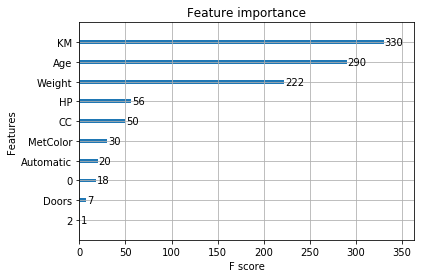

In [113]:
xgb.plot_importance(bst)
# xgb.plot_tree(bst, num_trees=2)
# xgb.to_graphviz(bst, num_trees=2)

In [2]:
# https://www.kaggle.com/ironfrown/deep-learning-house-price-prediction-keras
# http://androidkt.com/car-price-prediction/